In [2]:
from astropy.table import Table, vstack, join, hstack, Column
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import cm
import numpy as np
import pandas as pd

In [3]:
dr14 = Table.read('allStar-l31c.2.fits', hdu=1)


In [4]:
ok = (dr14['LOCATION_ID'] > 5067) & (dr14['LOCATION_ID'] < 5069)
ok2 = (dr14['LOCATION_ID'] > 5130) & (dr14['LOCATION_ID'] < 5132)

In [5]:
pal5_a = dr14[ok]
pal5_b = dr14[ok2]

pal5 = vstack([pal5_a, pal5_b])

In [6]:
target_a = (pal5_a['APOGEE2_TARGET1'] & 2**19 != 0)
target_b = (pal5_b['APOGEE2_TARGET1'] & 2**19 != 0)
target = (pal5['APOGEE2_TARGET1'] & 2**19 != 0)

In [22]:
candidates = pal5[target]
#All of the stars from the pal5 areas that have been marked as candidates

In [ ]:
fp = pal5['FPARAM']

In [ ]:
Temp = fp[:,0]
Metallicity = fp[:,3]
Logg = fp[:,1]
pal5['Temp'] = Temp
pal5['Metallicity'] = Metallicity
pal5['Logg'] = Logg

In [8]:
FPARAM = candidates['FPARAM']

In [9]:
temp = FPARAM[:,0]
metallicity = FPARAM[:,3]
logg = FPARAM[:,1]
candidates['Temp'] = temp
candidates['Metallicity'] = metallicity
candidates['Logg'] = logg

In [10]:
y = dr14['DEC'][ok]
x = dr14['RA'][ok]
y2 = dr14['DEC'][ok2]
x2 = dr14['RA'][ok2]

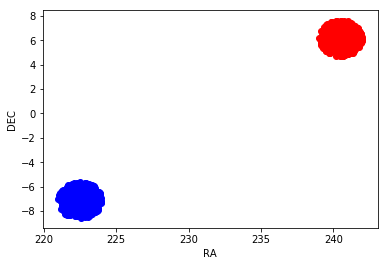

In [11]:
plt.scatter(x,y,color='b')
plt.scatter(x2,y2,color='r')
plt.xlabel('RA')
plt.ylabel('DEC')
plt.show()


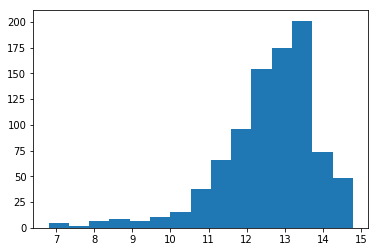

In [54]:
plt.hist(pal5['H'], bins=15)
plt.show()

In [13]:
gaia_pal5 = Table.read('gaia_pal5.csv', format='ascii')

In [29]:
total_pal5 = join(pal5, gaia_pal5, keys= ('RA','DEC'), join_type='left')
#crossmatching the pal5 table with gaia data

In [28]:
total_pal5.keep_columns(['RA','DEC','H_1','SNREV_1','VHELIO_AVG_1','ra','dec','pmra','pmdec','pmra_error','pmdec_error','Temp','Metallicity','Logg'])

In [16]:
gaia_candidates = Table.read('gaia_candidates.csv', format='ascii')


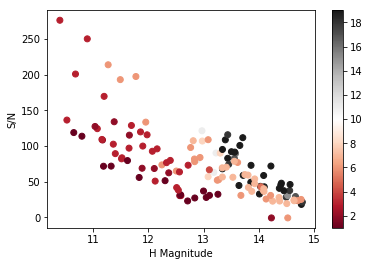

In [60]:
fig, ax = plt.subplots()
im = ax.scatter(candidates['H'], candidates['SNREV'], c=candidates['NVISITS'],cmap="RdGy")
ax.set(xlabel='H Magnitude', ylabel='S/N')
fig.colorbar(im,ax=ax)
fig.savefig('Pal5_HvsSN',format='png')
#Scatter plot of H magnitude vs. S/N with a colorbar set on number of visits

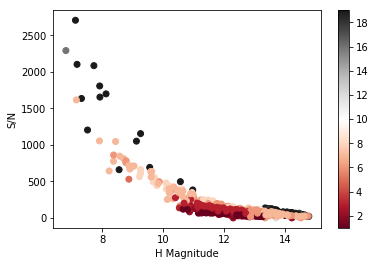

In [30]:
fig, ax = plt.subplots()
im1 = ax.scatter(pal5['H'], pal5['SNREV'], c=pal5['NVISITS'],cmap="RdGy")
ax.set(xlabel='H Magnitude', ylabel='S/N')
fig.colorbar(im1,ax=ax)
#Same plot as above except for the entire pal5 table

In [18]:
total_candidates = join(candidates, gaia_candidates, keys= ('RA','DEC'), join_type='left')
#all pal5 candidates crossmatched with gaia data

In [19]:
total_candidates.keep_columns(['RA','DEC','H_1','SNREV_1','VHELIO_AVG_1', 'NVISITS_1','ra','dec','pmra','pmdec','pmra_error','pmdec_error','Temp','Metallicity','Logg'])

In [39]:
pm = (gaia_a['pmra']< -2.11) & (gaia_a['pmra']> -2.48) & (gaia_a['pmdec']< -2.08) & (gaia_a['pmdec']> -2.42)
pm1 = (gaia_b['pmra']< -2.11) & (gaia_b['pmra']> -2.48) & (gaia_b['pmdec']< -2.08) & (gaia_b['pmdec']> -2.42)

In [42]:
total_pal5[p_m]
#This is the one star from the pal5 table that matches the proper motion of the pal5 cluster

H_1,RA,DEC,VHELIO_AVG_1,SNREV_1,Temp_1,Metallicity_1,Logg_1,ra,dec,pmra,pmra_error,pmdec,pmdec_error
float32,float64,float64,float32,float32,float32,float32,float32,float64,float64,float64,float64,float64,float64
13.648,221.482455,-8.19543,-33.167,50.8127,5786.7,-0.074142,4.3545,221.48243999,-8.19543352197,-2.177,0.079,-2.347,0.081


In [35]:
gaia_a = Table.read('pal5_a.csv')
gaia_b = Table.read('pal5_b.csv')
#These are the tables of stars from gaia data that are in a 1.5 degree radius of the center of pal5a and pal5b

In [40]:
gaia_a[pm]
#This is the table of the stars from the pal5a area that match the proper motion of the pal5 cluster

source_id,ra,ra_error,dec,dec_error,parallax,parallax_error,pmra,pmra_error,pmdec,pmdec_error,phot_g_mean_mag,bp_rp,radial_velocity,radial_velocity_error,phot_variable_flag,teff_val,a_g_val
int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str13,float64,float64
1942177854701118464,347.640090283,0.607859584661,46.6578685739,0.472831022168,0.166014401674,0.823916128021,-2.23254710462,1.44200899854,-2.10380940954,1.03606577917,20.449265,1.0422535,--,--,NOT_AVAILABLE,--,--
1942181020093343872,347.766366718,1.34140113058,46.7777809022,1.06014410682,0.935903658847,1.81915975398,-2.3736743162,3.0357595149,-2.11245204105,1.93629956304,20.865288,0.7113476,--,--,NOT_AVAILABLE,--,--
1942180367255879808,347.847613564,0.188666604638,46.758024086,0.17258290981,-0.0557499962427,0.263299814638,-2.18715604118,0.470720442324,-2.31251869795,0.413431775053,19.06001,1.1653728,--,--,NOT_AVAILABLE,--,--
1942179126011466368,347.70391905,0.106350343847,46.7116632987,0.10102465115,-0.0470062431301,0.152079096266,-2.18877955277,0.256170512842,-2.30969194156,0.236286906916,18.145452,1.0060577,--,--,NOT_AVAILABLE,--,--


In [41]:
gaia_b[pm1]
#No stars in pal5b fit in the proper motion window

source_id,ra,ra_error,dec,dec_error,parallax,parallax_error,pmra,pmra_error,pmdec,pmdec_error,phot_g_mean_mag,bp_rp,radial_velocity,radial_velocity_error,phot_variable_flag,teff_val,a_g_val
int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str13,float64,float64
